In [3]:
# Dependencies and Setup
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
Mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
Clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_data_df = pd.merge(Mouse_drug_data, Clinical_trial_data, on="Mouse ID")

# Display the data table for preview

combined_data_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = combined_data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
    
# Convert to DataFrame
tumor_volume_data_df = pd.DataFrame(mean_tumor_vol).reset_index()

# Preview DataFrame
tumor_volume_data_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_se = combined_data_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumor_vol_se_df = pd.DataFrame(tumor_vol_se).reset_index()
# Preview DataFrame
tumor_vol_se_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol_pivot = tumor_volume_data_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
tumor_volume_se_pivot = tumor_vol_se_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
print(mean_tumor_vol_pivot)
print(f"________________________________________________________________________________")
print(tumor_volume_se_pivot)

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zonifer

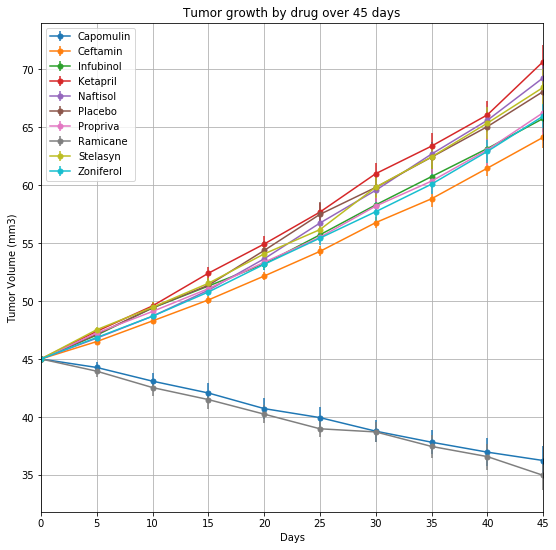

In [7]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(9,9))

for x in range(len(mean_tumor_vol_pivot)):
    #define x, y, SE, and labels
    ax.errorbar(mean_tumor_vol_pivot.index,mean_tumor_vol_pivot[mean_tumor_vol_pivot.columns[x]],
               tumor_volume_se_pivot[tumor_volume_se_pivot.columns[x]], label = mean_tumor_vol_pivot.columns[x],
               marker="o",
               markerSize=5
               )
ax.grid(axis="both")
ax.set_xlim(0,45)
ax.set_xlabel("Days")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor growth by drug over 45 days")
ax.legend(loc="best")

# Save the Figure

fig.savefig("tumor_growth_by_drug_45_days.png")

In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = combined_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
mean_met_df = pd.DataFrame(mean_met).reset_index()
# Preview DataFrame
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mean_met_se = combined_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
mean_met_se_df = pd.DataFrame(mean_met_se).reset_index()
# Preview DataFrame
mean_met_se_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [11]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_pivot = mean_met_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
mean_met_se_pivot = mean_met_se_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
mean_met_pivot
mean_met_se_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


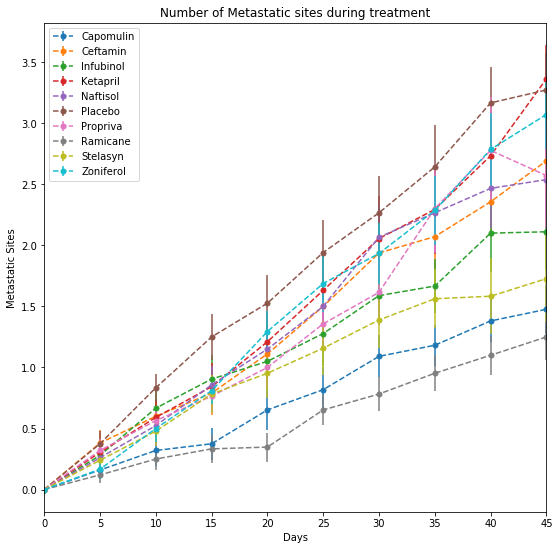

In [12]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots(figsize=(9,9))

for x in range(len(mean_met_pivot)):
    ax.errorbar(mean_met_pivot.index, mean_met_pivot[mean_met_pivot.columns[x]],
               mean_met_se_pivot[mean_met_se_pivot.columns[x]],
               label = mean_met_pivot.columns[x],
               marker="o",
               markerSize=5,
                ls="--"
               )
    
    ax.set_xlim(0,45)
    ax.set_xlabel("Days")
    ax.set_ylabel("Metastatic Sites")
    ax.set_title("Number of Metastatic sites during treatment")
    ax.legend(loc="best")
    ax.grid(axis="both")
# Save the Figure
fig.savefig("metastatic_sites_during_treatment.png")
# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_data_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count).reset_index().rename(columns={"Mouse ID" : "Number of Mice"})
# Preview DataFrame
mice_count_df

,Drug,Timepoint,Number of Mice
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [14]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot = mice_count_df.pivot(index="Timepoint", columns="Drug", values="Number of Mice")
# Preview the Data Frame
mice_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


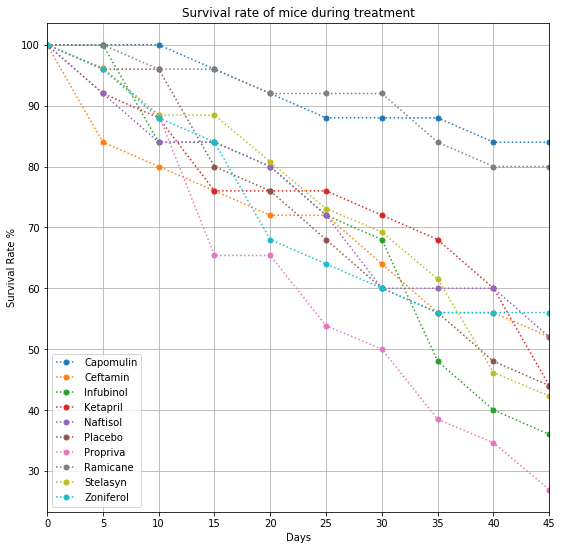

In [15]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots(figsize=(9,9))


for x in range(len(mice_count_pivot.columns)):
    ax.plot(mice_count_pivot.index, 
    mice_count_pivot[mice_count_pivot.columns[x]] / mice_count_pivot[mice_count_pivot.columns[x]][0]*100,
    label = mice_count_pivot.columns[x],
    marker="o",
    markerSize=5,
    ls=":"       
    )
ax.grid(axis="both")
ax.set_xlim(0,45)
ax.set_xlabel("Days")
ax.set_ylabel("Survival Rate %")
ax.set_title("Survival rate of mice during treatment")
ax.legend(loc="best")
    
    
# Save the Figure
fig.savefig("mice_survival.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
percent_chg = [-100 + mean_tumor_vol_pivot[mean_tumor_vol_pivot.columns[x]].values[-1]/mean_tumor_vol_pivot[mean_tumor_vol_pivot.columns[x]].values[0]*100 for x in range(len(mean_tumor_vol_pivot))]
# Display the data to confirm
percent_chg

[-19.47530266789417,
 42.51649185589744,
 46.123471727851864,
 57.02879468660606,
 53.923347134769216,
 51.29796048315151,
 47.24117486320637,
 -22.320900462766673,
 52.085134287899024,
 46.579750865095235]

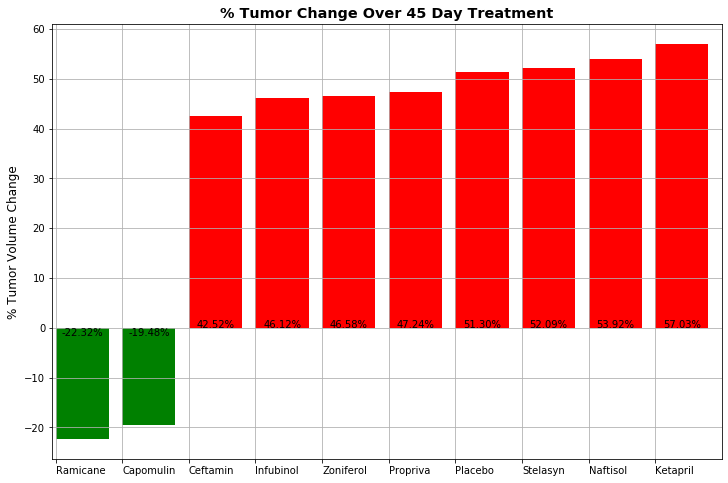

In [17]:
# Store all Relevant Percent Changes into a Tuple
percent_chg_df = pd.DataFrame({"Percent Change":percent_chg}, index=mean_tumor_vol_pivot.columns).sort_values(by="Percent Change").reset_index()

percent_chg_df
# Splice the data between passing and failing drugs
fig, ax = plt.subplots(figsize=(12,8))

negative = ax.bar(percent_chg_df[percent_chg_df["Percent Change"]<0]["Drug"],percent_chg_df[percent_chg_df["Percent Change"]<0]["Percent Change"],
                  align="edge",
                  
                  color="green")

positive = ax.bar(percent_chg_df[percent_chg_df["Percent Change"]>0]["Drug"],percent_chg_df[percent_chg_df["Percent Change"]>0]["Percent Change"],
                  align="edge",
                  color="red")

# Orient widths. Add labels, tick marks, etc. 
ax.set_xlim(-0.05,10)
ax.set_ylabel('% Tumor Volume Change', fontsize='large')
ax.set_title('% Tumor Change Over 45 Day Treatment', fontsize='x-large', weight='bold')

plt.xticks(ha='left')
plt.grid()

# Use functions to label the percentages of changes
def pos_bar_label(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate("{:.2f}%".format(height),
            xy=(bar.get_x() + bar.get_width() / 2, 0),
            ha="center"
                       )
def neg_bar_label(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate("{:.2f}%".format(height),
            xy=(bar.get_x() + bar.get_width() / 2, 0),
           # xytext=(0, -5),
            ha="center",
            va="top"
                       )
# Call functions to implement the function calls
pos_bar_label(positive)
neg_bar_label(negative)
# Save the Figure
fig.savefig("tumor_chg_bar.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)